In [1]:
import keras
import pandas as pd
import numpy as np
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType
from pyspark.sql.functions import col , column
sc = SparkContext()
sqlContext = SQLContext(sc)
# File location and type
file_location_adult = "./data/train.csv"
file_type = "csv"

# CSV options#
infer_schema = "true"
first_row_is_header = "false"
delimiter = ","



schema = StructType([
      StructField('Type', IntegerType()),
      StructField('Name', StringType()),
      StructField('Age', IntegerType()),
      StructField('Breed1', IntegerType()),
      StructField('Breed2', IntegerType()),
      StructField('Gender', IntegerType()),
      StructField('Color1', IntegerType()),
      StructField('Color2', IntegerType()),
      StructField('Color3', IntegerType()),
      StructField('MaturitySize', IntegerType()),
      StructField('FurLength', IntegerType()),
      StructField('Vaccinated', IntegerType()),
      StructField('Dewormed', IntegerType()),
      StructField('Sterilized', IntegerType()),
      StructField('Health', IntegerType()),
    StructField('Quantity', IntegerType()),
    StructField('Fee', IntegerType()),
    StructField('State', IntegerType()),
    StructField('RescuerID', StringType()),
    StructField('VideoAmt', IntegerType()),
    StructField('Description', StringType()),
    StructField('PetID', StringType()),
    StructField('PhotoAmt', IntegerType()),
    StructField('AdoptionSpeed', IntegerType()),
])



#sc = SparkContext()
#sqlContext = SQLContext(sc)
#spark = SparkSession(sc)
spark=SparkSession.builder.appName('Basics').getOrCreate()
df = spark.read.csv(file_location_adult,header="True",inferSchema=True)
#sparkDF = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load(file_location_adult)
df=df.withColumn("AdoptionSpeed", col("AdoptionSpeed").cast(IntegerType()))
df.schema
#adult_df = (spark.read.format(file_type) 
#                   .schema(schema)
#                    .option("inferSchema", infer_schema) 
#                   .option("header", first_row_is_header) 
#                   .option("sep", delimiter) 
#                    .load(file_location_adult))

#df=pd.read_csv(r'./data/train.csv') 
#sdf=sqlc.createDataFrame(df) 

Using TensorFlow backend.


StructType(List(StructField(Type,IntegerType,true),StructField(Name,StringType,true),StructField(Age,IntegerType,true),StructField(Breed1,IntegerType,true),StructField(Breed2,IntegerType,true),StructField(Gender,IntegerType,true),StructField(Color1,IntegerType,true),StructField(Color2,IntegerType,true),StructField(Color3,IntegerType,true),StructField(MaturitySize,IntegerType,true),StructField(FurLength,IntegerType,true),StructField(Vaccinated,IntegerType,true),StructField(Dewormed,IntegerType,true),StructField(Sterilized,IntegerType,true),StructField(Health,IntegerType,true),StructField(Quantity,IntegerType,true),StructField(Fee,IntegerType,true),StructField(State,IntegerType,true),StructField(RescuerID,StringType,true),StructField(VideoAmt,IntegerType,true),StructField(Description,StringType,true),StructField(PetID,StringType,true),StructField(PhotoAmt,StringType,true),StructField(AdoptionSpeed,IntegerType,true)))

In [2]:
df.take(5)

[Row(Type=2, Name='Nibble', Age=3, Breed1=299, Breed2=0, Gender=1, Color1=1, Color2=7, Color3=0, MaturitySize=1, FurLength=1, Vaccinated=2, Dewormed=2, Sterilized=2, Health=1, Quantity=1, Fee=100, State=41326, RescuerID='8480853f516546f6cf33aa88cd76c379', VideoAmt=0, Description="Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.", PetID='86e1089a3', PhotoAmt='1.0', AdoptionSpeed=2),
 Row(Type=2, Name='No Name Yet', Age=1, Breed1=265, Breed2=0, Gender=1, Color1=1, Color2=2, Color3=0, MaturitySize=2, FurLength=2, Vaccinated=3, Dewormed=3, Sterilized=3, Health=1, Quantity=1, Fee=0, State=41401, RescuerID='3082c7125d8fb66f7dd4bff4192c8b14', VideoAmt=0, Description='I just found it alon

In [3]:
def run_sql(statement):
    try:
        result = sqlContext.sql(statement)
    except Exception as e:
        print(e.desc, '\n', e.stackTrace)
        return
    return result

df.registerTempTable("animal")
tbls = run_sql('show tables')
tbls.toPandas()

,database,tableName,isTemporary
0,,animal,True


In [4]:
#age
df_spark = run_sql("SELECT * FROM animal Limit 2000")
type(df_spark)
df_spark=df_spark.withColumn('Age_year',(df_spark.Age/12).cast((IntegerType())   )   )
df_spark=df_spark.drop('Age')



In [5]:

df_spark.registerTempTable("animal")
df_spark = run_sql("SELECT * FROM animal Limit 2000")
df_spark=df_spark.toPandas()

In [6]:
df_spark

,Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_year
0,2,Nibble,299,0,1,1,7,0,1,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2.0,0
1,2,No Name Yet,265,0,1,1,2,0,2,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0.0,0
2,1,Brisco,307,0,1,2,7,0,2,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3.0,0
3,1,Miko,307,0,2,1,2,0,2,1,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2.0,0
4,1,Hunter,307,0,1,1,0,0,2,1,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2.0,0
5,2,None,266,0,2,5,6,0,2,1,...,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2.0,0
6,2,BULAT,264,264,1,1,0,0,2,3,...,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1.0,1
7,1,Siu Pak & Her 6 Puppies,307,0,2,1,2,7,2,1,...,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3.0,0
8,2,None,265,0,2,6,0,0,2,2,...,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1.0,0
9,2,Kitty,265,0,2,1,7,0,2,2,...,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4.0,1


In [15]:
#clean data for adoptionspeed
delete=df_spark[df_spark['AdoptionSpeed']>4]
#so the 10131 data has problem
#print(delete)
delete

,Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_year
144,2,5 Cutie Kitty,265,247,3,1,3,7,2,2,...,5,0,41401,f98fe65b3bb68db1970f3f85135e3f26,0,"""I have 5 cute kittens available for adoption....",but we would ask few question to access if yo...,c7eac7b01,5.0,0
214,2,Jayden,266,254,2,1,4,7,1,1,...,1,0,41326,b83f8e5564176a40d05a6f395843ae85,0,"""Momi kucing beranak di depan pintu rumah saya...","DON'T BUY"""" Terima Kasih.""",2f3227612,5.0,0
246,1,Labrador + Ridgeback Female,141,0,2,1,0,0,2,2,...,1,0,41326,33fff6f94d5900e901faea072bede8b2,0,"""Reena is mixed breed of Labrador and rare bre...",intelligent and behave. We are seeking a new ...,d5b9e0322,8.0,0
285,1,Rocco,20,0,1,1,4,7,2,1,...,1,0,41326,9a8ad17cd3f73517e9e0b8acd4d89af7,0,"""Rocco is an adorable beagle. My wife bought h...","""""stay"""" & """"down"""". Always at night we go ou...",e317b2a73,5.0,4
632,1,Save ME OR I'll Die #33,307,0,3,2,0,0,2,2,...,4,0,41401,ee2747ce26468ec44c7194e7d1d9dad9,0,"""PLEASE RESCUE/ADOPT ME FROM KLANG POUND OR I ...",then turn Right 3) Keep Left and turn Left at...,2418f7929,7.0,1
874,2,Bear & Koko,266,0,3,2,6,0,1,1,...,2,0,41332,c19fc47db363e9ac131d0ecbf25b9839,2,"""These 2 were left alone at staircase next to ...",sekarang sudah mula makan makanan basah pejal...,d33c9174f,12.0,0
914,2,"Mokey Jr, Jayden, Jack Jr",266,0,3,1,4,6,1,1,...,3,0,41326,b83f8e5564176a40d05a6f395843ae85,0,"""Momi kucing beranak di depan pintu rumah saya...","DON'T BUY"""" Terima kasih.""",fbed8fc1a,9.0,0
1009,1,Snoopy,307,103,1,2,5,0,2,1,...,1,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,"""Very lovable, active, the """"brains"""" (clever)","manja and full of kisses!""",1b932e373,8.0,0
1071,2,Aeden And Amber,266,0,3,1,6,7,2,2,...,2,0,41401,b5950e3453c98daba8642f721ce85ba9,0,"""Aeden and Amber are siblings which were rescu...",affection and care throughout their life from...,cd617c72c,8.0,0


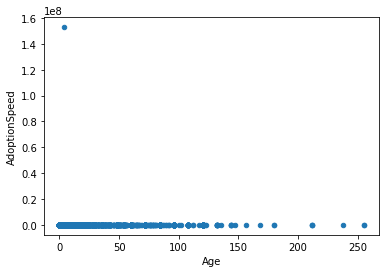

In [10]:

df_spark.plot(kind='scatter', x='Age', y='AdoptionSpeed')


In [88]:
df_pd=pd.read_csv(file_location_adult)
df_pd.head(5)
#df_pd.info()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [89]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [90]:
# all AdoptionSpeed data make sense
dele=df_pd[df_pd.AdoptionSpeed>4]
dele


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed


In [91]:
df_pd[df_pd.MaturitySize>4]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed


In [92]:
df_pd.Type.isnull().values.any()

False

In [93]:
df_pd.Name.isnull().values.any()

True

In [94]:
df_pd.Name=df_pd.Name.fillna('N/A')

In [95]:
df_pd.Breed1.isnull().values.any()

False

In [96]:
df_pd.Breed2.isnull().values.any()

False

In [97]:
df_pd.Gender.isnull().values.any()

False

In [98]:
df_pd.Color1.isnull().values.any()

False

In [99]:
df_pd.Color2.isnull().values.any()

False

In [100]:
df_pd.Color3.isnull().values.any()

False

In [101]:
df_pd.MaturitySize.isnull().values.any()

False

In [102]:
df_pd.FurLength.isnull().values.any()

False

In [103]:
df_pd.Vaccinated.isnull().values.any()  

False

In [104]:
df_pd.Dewormed.isnull().values.any()

False

In [105]:
df_pd.Sterilized.isnull().values.any()

False

In [106]:
df_pd.Health.isnull().values.any()

False

In [107]:
df_pd.Quantity.isnull().values.any()

False

In [108]:
df_pd.Fee.isnull().values.any()

False

In [109]:
df_pd.State.isnull().values.any()

False

In [110]:
df_pd.RescuerID.isnull().values.any()

False

In [111]:
df_pd.VideoAmt.isnull().values.any()

False

In [112]:
df_pd.PetID.isnull().values.any()  

False

In [113]:
df_pd.AdoptionSpeed.isnull().values.any()

False

In [114]:
#age to year
df_pd['Age_year'] = df_pd.Age//12

In [116]:
df_pd.head(100)
df_pd.drop('Age',axis=1)

,Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_year
0,2,Nibble,299,0,1,1,7,0,1,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0
1,2,No Name Yet,265,0,1,1,2,0,2,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0
2,1,Brisco,307,0,1,2,7,0,2,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0
3,1,Miko,307,0,2,1,2,0,2,1,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0
4,1,Hunter,307,0,1,1,0,0,2,1,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0
5,2,N/A,266,0,2,5,6,0,2,1,...,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,0
6,2,BULAT,264,264,1,1,0,0,2,3,...,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,1
7,1,Siu Pak & Her 6 Puppies,307,0,2,1,2,7,2,1,...,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0
8,2,N/A,265,0,2,6,0,0,2,2,...,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,0
9,2,Kitty,265,0,2,1,7,0,2,2,...,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,1
